In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# ST results

In [2]:
data = np.load('st_scores_HFn_10k.npz')
st = np.squeeze(data['score'][...,:35,:]).mean(-1)
print st.shape
print data.keys()
print data['components'].shape
print data['n_samples'].shape

(4, 10, 35)
['components', 'n_samples', 'score']
(10,)
(37,)


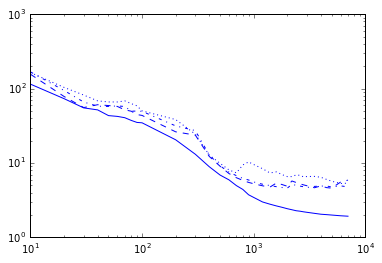

In [3]:
ls = ['-', '--', '-.', ':']
for i in range(len(st)):
    score = st[i]
    plt.plot(data['n_samples'][:35], score[-1], color='b', ls=ls[i])
    
plt.xscale('log')
plt.yscale('log')

# KRR results

In [4]:
#data_krr = np.load('HFn_krr_score.npz')
data_krr = np.load('HFn_krr_score_fineGamma.npz')
ks_all = data_krr['score'].mean(-1)
x = data_krr['n_samples']
    
print ks_all.shape
x = range(10,100,10) + range(100, 1000, 100)
print data_krr['n_samples']
print data_krr['gammas']

(2, 3, 7, 35)
[  10   20   30   40   50   60   70   80   90  100  200  300  400  500  600
  700  800  900 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000 3500
 4000 4500 5000 6000 7000]
[  1.00000000e-06   1.00000000e-02   1.00000000e-05   1.00000000e-03
   1.00000000e-08   1.00000000e-04   1.00000000e-01]


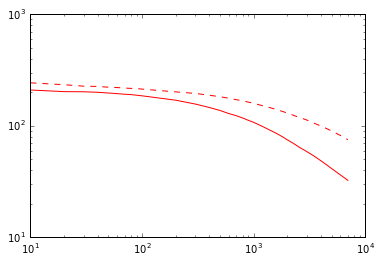

In [52]:
ls = ['-', '--', '-.', ':']
for i in range(len(ks_all)):
    score = ks_all[i]
    plt.plot(data_krr['n_samples'], score[0][1], ls=ls[i],color='r')
    
plt.xscale('log')
plt.yscale('log')

# Combined plot

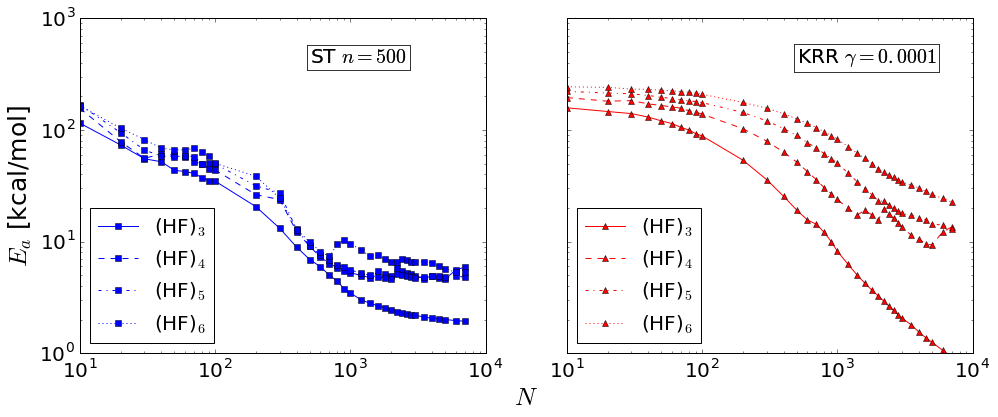

In [48]:
ls = ['-', '--', '-.', ':']
labels = ['(HF)$_3$','(HF)$_4$','(HF)$_5$','(HF)$_6$']

def method_plot(ax, x, y, color ,text, marker):
    ax.plot(x, y, color=color, ls=ls[i], label=labels[i], marker=marker)
    ax.text(500, 400, text, fontsize=20,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':3})
    ax.legend(loc=3, fontsize=20, numpoints=1)
    ax.tick_params(labelsize=20)

f, axarr = plt.subplots(1, 2, figsize=(16,6), sharex=True, sharey=True)
for i in range(len(st)):
    score = st[i]
    method_plot(axarr[0], data['n_samples'][:35], score[-1], 'b', 'ST $n=500$', 's')

for i in range(len(ks_all)):
    score = ks_all[i]
    method_plot(axarr[1], data_krr['n_samples'], score[0][1], 'r', 'KRR $\gamma=0.0001$', '^')
    
axarr[0].set_xlabel(r'$N$', fontsize=25, x=1.1)
axarr[0].set_ylabel(r'$E_a$ [kcal/mol]', fontsize=25)

plt.xscale('log')
plt.yscale('log')

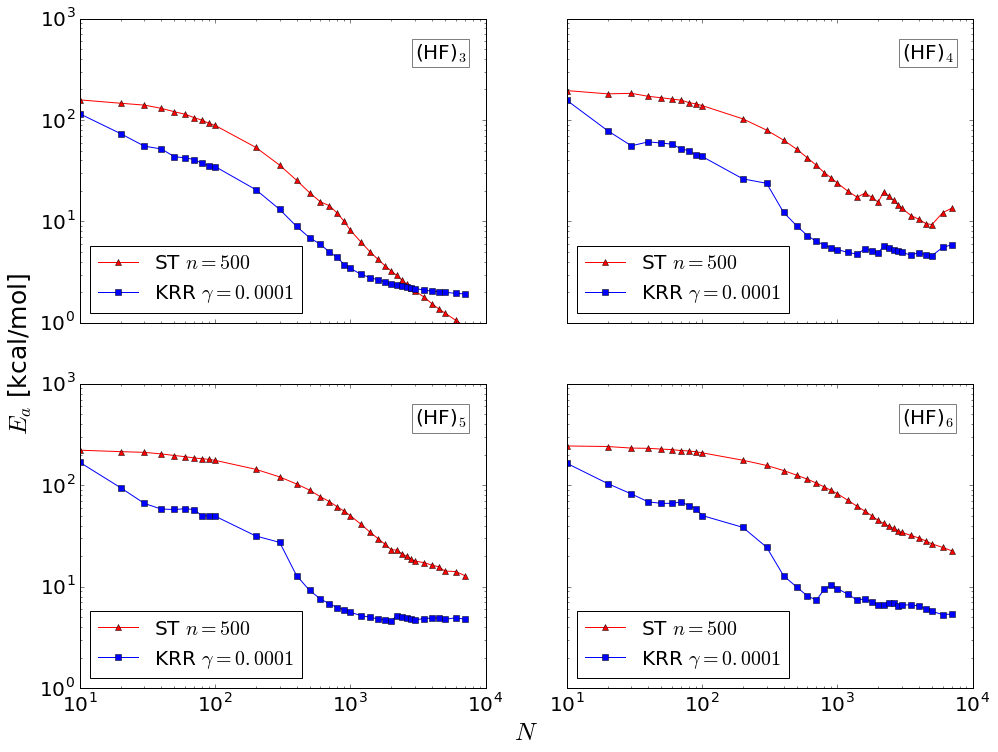

In [49]:
labels = ['(HF)$_3$','(HF)$_4$','(HF)$_5$','(HF)$_6$']

f, axarr = plt.subplots(2, 2, figsize=(16,12), sharex=True, sharey=True)
for i in range(len(ks_all)):
    #plt.figure()
    score = ks_all[i]
    ax = axarr[i/2, i%2]
    ax.plot(data_krr['n_samples'], score[0][1], color='r', marker='^', label='ST $n=500$')
    
    score = st[i]
    ax.plot(data['n_samples'][:35], score[-1], color='b', marker='s',label='KRR $\gamma=0.0001$')
    
    ax.text(3000, 400, labels[i], fontsize=20,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':3})
    ax.legend(numpoints=1, loc=3, fontsize=20)
    ax.tick_params(labelsize=20)
    
    if i == 2:
        ax.set_xlabel(r'$N$', fontsize=25, x=1.1)
        ax.set_ylabel(r'$E_a$ [kcal/mol]', fontsize=25, y=1.1)
    
plt.yscale('log')
plt.xscale('log')

# Old stuff

ValueError: x and y must have same first dimension

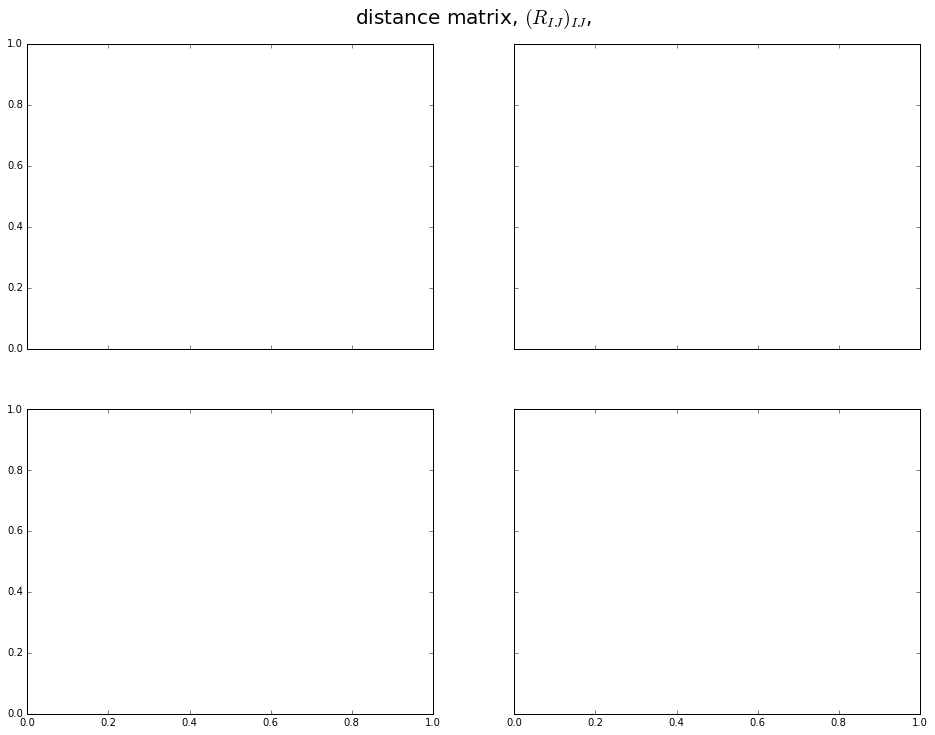

In [46]:
labels = [r'(HF)$_%d$' % i for i in range(3,7)]
ls = [':', '-.', '--', '-']
descriptors = [
    r'distance matrix, $(R_{IJ})_{IJ}$,',
    r'Coulomb matrix (nosort), $\left(\frac{Z_{IJ}}{R_{IJ}}\right)_{IJ}$',
    r'London matrix (nosort), $\left(\frac{Z_{IJ}}{R_{IJ}^6}\right)_{IJ}$',
]

for d in range(len(ks_all[0])):
#for d in range(2,3):
    f, axarr = plt.subplots(2, 2, figsize=(16,12), sharex=True, sharey=True)
    #plt.title(descriptors[d])
    #ks_d = ks_all[:,d,...]
    #print ks_d.shape
    for i in range(4):
        ks = ks_all[i, d]
        ax = axarr[i/2, i%2]
        if i == 0:
            ax.set_title(descriptors[d], fontsize=20, x=1.1, y=1.05)
        for j in range(len(st[i])):
            if j == len(st[i]) - 1:
                ind = len(ls) - 1
                marker = 's'
                label = r'ST $n=500$'
            else:
                ind = (j)/len(ls)
                marker = ''
                label = ''
            ax.plot(x, st[i][j].T, marker=marker, color='b', ls = ls[ind], label = label)
        for j in range(len(ks)):
            #if j == len(ks[i]) - 1:
            if j == 0:
                ind = len(ls) - 1
                marker = '^'
                label = r'KR $\gamma=0.01$'
            else:
                ind = (j)/len(ls)
                marker = ''
                label = ''
            ax.plot(x, ks[j], marker=marker, color='r', ls = ls[ind], label = label)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylim([.1,1000])
        ax.text(350, 400, labels[i], fontsize=15,
            bbox={'facecolor':'white', 'alpha':0.5, 'pad':3})
        if i == 2:
            ax.set_xlabel(r'$N$', fontsize=15, x=1.1)
            ax.set_ylabel(r'$E_a$ [kcal/mol]', fontsize=15, y=1.1)
            ax.legend(loc=3, numpoints=1)
pass

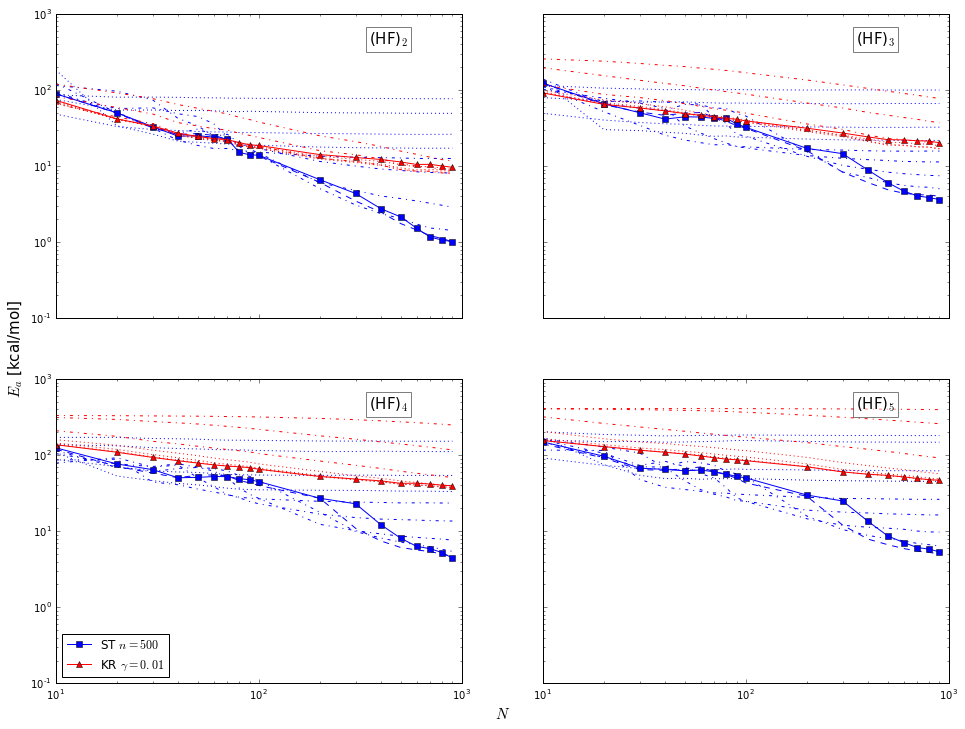

In [6]:
labels = [r'(HF)$_%d$' % i for i in range(2,7)]
ls = [':', '-.', '--', '-']

f, axarr = plt.subplots(2, 2, figsize=(16,12), sharex=True, sharey=True)
for i in range(4):
    ax = axarr[i/2, i%2]
    for j in range(len(st[i])):
        if j == len(st[i]) - 1:
            ind = len(ls) - 1
            marker = 's'
            label = r'ST $n=500$'
        else:
            ind = (j)/len(ls)
            marker = ''
            label = ''
        ax.plot(x, st[i][j].T, marker=marker, color='b', ls = ls[ind], label = label)
    for j in range(len(ks[i])):
        #if j == len(ks[i]) - 1:
        if j == 0:
            ind = len(ls) - 1
            marker = '^'
            label = r'KR $\gamma=0.01$'
        else:
            ind = (j)/len(ls)
            marker = ''
            label = ''
        ax.plot(x, ks[i][j].T, marker=marker, color='r', ls = ls[ind], label = label)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([.1,1000])
    ax.text(350, 400, labels[i], fontsize=15,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':3})
    if i == 2:
        ax.set_xlabel(r'$N$', fontsize=15, x=1.1)
        ax.set_ylabel(r'$E_a$ [kcal/mol]', fontsize=15, y=1.1)
        ax.legend(loc=3, numpoints=1)
pass